In [1]:
# Script to install the required packages for the stock market analysis
#!pip install yfinance
#!pip install pandas
#!pip install matplotlib
#!pip install matplotlib mplfinance
#!pip install seaborn
#!pip install scikit-learn
#!pip install ipywidgets

In [2]:
# set the library
import yfinance as yf
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import datetime
import os
import mplfinance as mpf
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import ipywidgets as widgets
from IPython.display import display

In [3]:
# List of major tech stocks to analyze
tech_stocks = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA", "NVDA", "META", "AMD", "INTC", "NFLX"]

In [4]:
# Dictionary to store the data
stocks_data = {}

# Loop through each stock in the list
for ticker in tech_stocks:
    stock = yf.Ticker(ticker)
    data = stock.history(period="10y")
    data['Stock'] = ticker  # Add a new column for the stock name
    # Keep only the date part of the datetime
    data.reset_index(inplace=True)  # Ensure 'Date' is a column, not an index
    data['Date'] = data['Date'].dt.date
    stocks_data[ticker] = data

# Optional: Convert the dictionary to a DataFrame for better visualization
all_stocks_df = pd.concat(stocks_data)
all_stocks_df


Date         Open         High          Low        Close  \
AAPL 0     2015-02-27    29.032600    29.159898    28.639544    28.688677   
     1     2015-03-02    28.865100    29.095127    28.652939    28.829367   
     2     2015-03-03    28.800338    28.925401    28.606040    28.889668   
     3     2015-03-04    28.831600    28.934329    28.657404    28.706533   
     4     2015-03-05    28.715471    28.753436    28.085687    28.230850   
...               ...          ...          ...          ...          ...   
NFLX 2510  2025-02-20  1042.000000  1045.000000  1015.590027  1024.540039   
     2511  2025-02-21  1029.420044  1032.380005   999.390015  1003.150024   
     2512  2025-02-24  1008.000000  1015.169983   984.479980   988.469971   
     2513  2025-02-25   989.400024   994.400024   955.000000   977.239990   
     2514  2025-02-26   977.000000  1000.890015   976.900024   990.059998   

              Volume  Dividends  Stock Splits Stock  
AAPL 0     248059200        0.0           0.0  AAPL  
     1     192386800        0.0           0.0  AAPL  
     2     151265200        0.0           0.0  AAPL  
     3     126665200        0.0           0.0  AAPL  
     4     226068400        0.0           0.0  AAPL  
...              ...        ...           ...   ...  
NFLX 2510    3111800        0.0           0.0  NFLX  
     2511    3738700        0.0           0.0  NFLX  
     2512    4426200        0.0           0.0  NFLX  
     2513    4738300        0.0           0.0  NFLX  
     2514    3389041        0.0           0.0  NFLX  

[25150 rows x 9 columns]

In [5]:
# Reset the index to separate the date into its own column
all_stocks_df.reset_index(inplace=True)


In [6]:
# Rename 'level_0' to 'Stock'
all_stocks_df.rename(columns={'level_0': 'Stock'}, inplace=True)

# Rearrange columns to have 'Date' and 'Stock' as the first two columns
columns_to_keep = ['Stock', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume']
all_stocks_df = all_stocks_df[columns_to_keep]

# Display the first few rows of the DataFrame
print(all_stocks_df.head())

  Stock Stock        Date       Open       High        Low      Close  \
0  AAPL  AAPL  2015-02-27  29.032600  29.159898  28.639544  28.688677   
1  AAPL  AAPL  2015-03-02  28.865100  29.095127  28.652939  28.829367   
2  AAPL  AAPL  2015-03-03  28.800338  28.925401  28.606040  28.889668   
3  AAPL  AAPL  2015-03-04  28.831600  28.934329  28.657404  28.706533   
4  AAPL  AAPL  2015-03-05  28.715471  28.753436  28.085687  28.230850   

      Volume  
0  248059200  
1  192386800  
2  151265200  
3  126665200  
4  226068400  


In [7]:
# Remove duplicate 'Stock' column
all_stocks_df = all_stocks_df.loc[:, ~all_stocks_df.columns.duplicated()]

# Dictionary to store individual stock DataFrames
individual_stock_dfs = {}

# Directory to save the CSV files
output_dir = 'stock_data'
os.makedirs(output_dir, exist_ok=True)

# Loop through each stock and create separate DataFrames
for ticker in tech_stocks:
    individual_stock_dfs[ticker] = all_stocks_df[all_stocks_df['Stock'] == ticker]

    # Save each DataFrame to a CSV file (optional)
    individual_stock_dfs[ticker].to_csv(os.path.join(output_dir, f'{ticker}_stock_data.csv'), index=False)

# Example: Access the DataFrame for Google (GOOGL)
print(individual_stock_dfs['GOOGL'].head())

      Stock        Date       Open       High        Low      Close    Volume
5030  GOOGL  2015-02-27  27.806698  28.368164  27.750901  28.029890  68328000
5031  GOOGL  2015-03-02  28.247601  28.695477  28.055796  28.647152  50406000
5032  GOOGL  2015-03-03  28.713409  28.937597  28.421966  28.834970  50526000
5033  GOOGL  2015-03-04  28.744299  28.976457  28.522602  28.812054  37964000
5034  GOOGL  2015-03-05  28.876323  29.054675  28.807074  28.966496  35918000


In [8]:
# Function to calculate investment returns
def calculate_returns(initial_investment, ticker):
    data = individual_stock_dfs[ticker]
    start_price = data.iloc[0]['Close']
    end_price = data.iloc[-1]['Close']
    returns = (end_price / start_price) * initial_investment
    return returns

# Example usage
initial_investment = 1000  # Example initial investment amount in USD
for ticker in tech_stocks:
    returns = calculate_returns(initial_investment, ticker)
    print(f"If you invested ${initial_investment} in {ticker} 10 years ago, you would have ${returns:.2f} today.")

If you invested $1000 in AAPL 10 years ago, you would have $8378.22 today.
If you invested $1000 in MSFT 10 years ago, you would have $10562.08 today.
If you invested $1000 in GOOGL 10 years ago, you would have $6162.35 today.
If you invested $1000 in AMZN 10 years ago, you would have $11276.83 today.
If you invested $1000 in TSLA 10 years ago, you would have $21451.76 today.
If you invested $1000 in NVDA 10 years ago, you would have $246996.93 today.
If you invested $1000 in META 10 years ago, you would have $8563.68 today.
If you invested $1000 in AMD 10 years ago, you would have $33678.46 today.
If you invested $1000 in INTC 10 years ago, you would have $915.41 today.
If you invested $1000 in NFLX 10 years ago, you would have $14593.12 today.


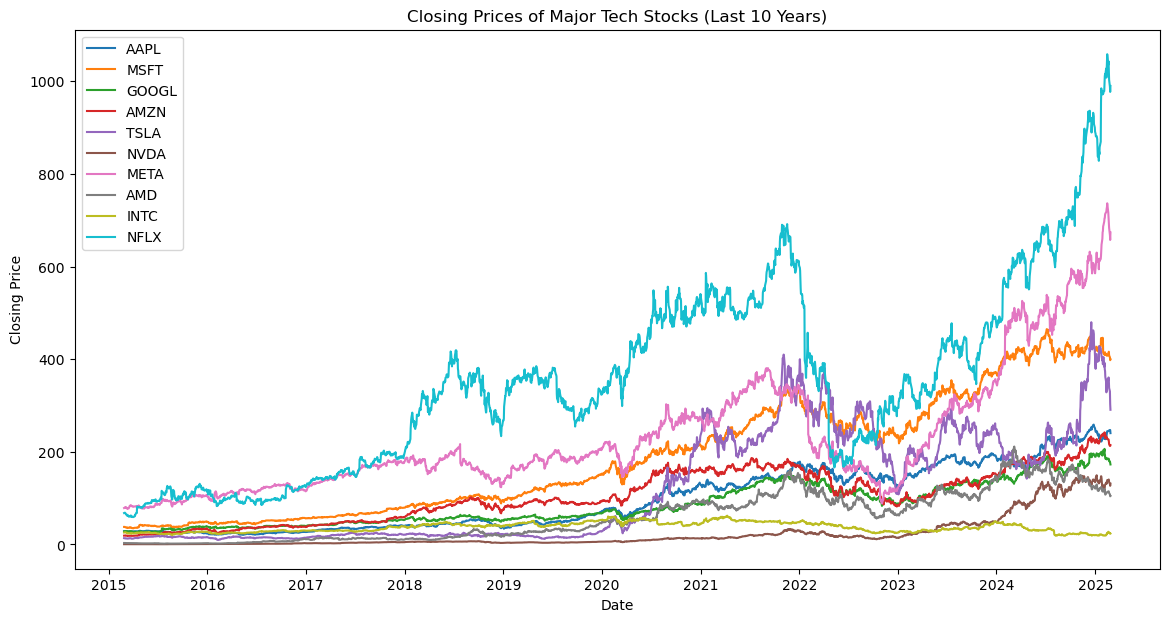

Text(0.5, 1.0, 'Correlation Matrix of Tech Stocks')

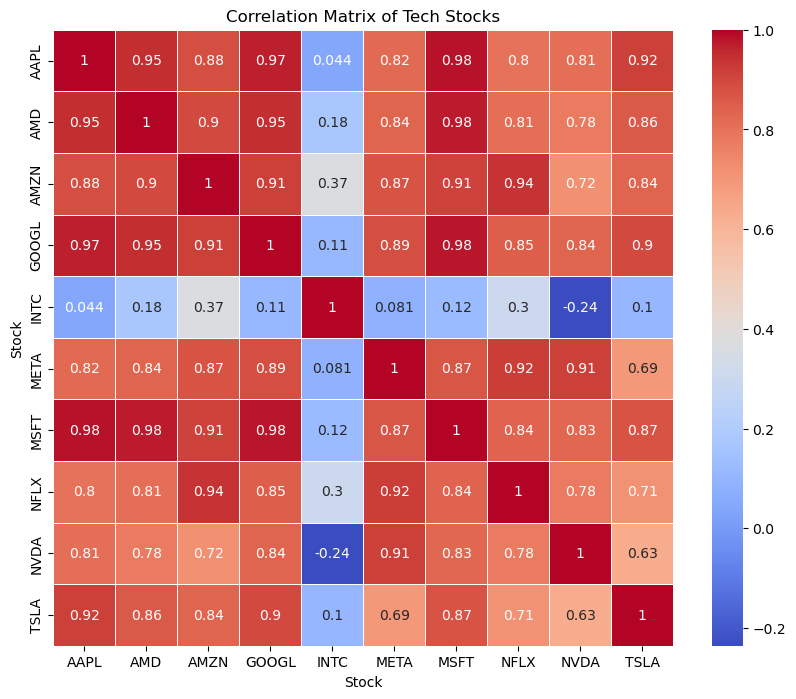

In [9]:
# Calculate summary statistics for each stock
summary_stats = all_stocks_df.groupby('Stock').describe()

# Plot closing prices over time
plt.figure(figsize=(14, 7))
for ticker in tech_stocks:
    plt.plot(individual_stock_dfs[ticker]['Date'], individual_stock_dfs[ticker]['Close'], label=ticker)
plt.title('Closing Prices of Major Tech Stocks (Last 10 Years)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Plot a correlation matrix
correlation_matrix = all_stocks_df.pivot_table(index='Date', columns='Stock', values='Close').corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Tech Stocks')
#plt.show()

In [10]:
# Ensure 'Date' is a datetime type and set as index
#data['Date'] = pd.to_datetime(data['Date'])
#data.set_index('Date', inplace=True)

# Plot yearly candlestick charts
#for year in range(data.index.year.min(), data.index.year.max() + 1):
 #   yearly_data = data[data.index.year == year]
  #  if not yearly_data.empty:
   #     mpf.plot(yearly_data, type='candle', style='charles', title=f"{ticker} - {year}", ylabel='Price', volume=True)
    #    plt.close()

#print("Yearly candlestick charts created and saved for each stock.")

In [11]:
# Fetch data from yfinance and create candlestick charts
#for ticker in tech_stocks:
    # Fetch historical data
    #stock = yf.Ticker(ticker)
    #data = stock.history(period="10y")
    
    # Ensure 'Date' is the index
    #data.reset_index(inplace=True)
    #data.set_index("Date", inplace=True)
    
    # Create the candlestick chart
    #mpf.plot(data, type='candle', style='charles', title=ticker, ylabel='Price', volume=True)
    
    #plt.close()

#print("Candlestick charts created and saved for each stock.")




In [12]:
import json
# Define the folder containing stock data CSV files
stock_folder = "stock_data"

# List all CSV files in the folder
csv_files = [f for f in os.listdir(stock_folder) if f.endswith(".csv")]

# Prepare storage dictionaries
stock_data_dict = {}
stock_list = {"stocks": [], "years": []}

In [13]:
# Process each stock file
for file in csv_files:
    stock_name = file.replace("_stock_data.csv", "").upper()  # Extract stock name
    file_path = os.path.join(stock_folder, file)
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime format
    df['Year'] = df['Date'].dt.year  # Extract year
    # Drop NaN values to prevent JSON errors
    df = df.dropna()
    # Add stock name to the list
    if stock_name not in stock_list["stocks"]:
        stock_list["stocks"].append(stock_name)
    # Store unique years
    unique_years = df['Year'].unique().tolist()
    stock_list["years"].extend(unique_years)
    # Convert DataFrame to JSON format (nested by year)
    stock_data_dict[stock_name] = {}
    for year in unique_years:
        df_year = df[df['Year'] == year].drop(columns=["Year"])
        if not df_year.empty:  # Only add non-empty years
            stock_data_dict[stock_name][str(year)] = df_year.to_dict(orient='records')


In [14]:

# Ensure unique and sorted years
stock_list["years"] = sorted(set(stock_list["years"]))
# Convert all 'Date' fields to string format for JSON compatibility
for stock, years_data in stock_data_dict.items():
    for year, records in years_data.items():
        for record in records:
            record["Date"] = pd.to_datetime(record["Date"]).strftime('%Y-%m-%d')  # Fix Timestamp issue
# Convert to JavaScript format
js_content = "const stockData = " + json.dumps(stock_data_dict, indent=4) + ";\n"
js_content += "const stockList = " + json.dumps(stock_list, indent=4) + ";"
# Save as a JavaScript file
with open("stock_data.js", "w") as f:
    f.write(js_content)
print("JSON files created successfully!")

JSON files created successfully!
